# **LSTM 구조**
LSTM은 Long Short-Term Memory의 약자이다.즉, 단기기억을 오래 기억하기 위해 고안된 모델이다.

기본개념은 동일하다. LSTM에서는 입력과 가중치를 곱하고 절편을 더해 활성화 함수를 통과시키는 구조를 여러개 가지고 있다.

은닉 상태는 입력과 이전의 타임 스텝의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은닉 상태를 만든다,

또 tanh 활성화 함수를 통과한 어떤 값과 곱해져서 은닉 상태를 만든다.

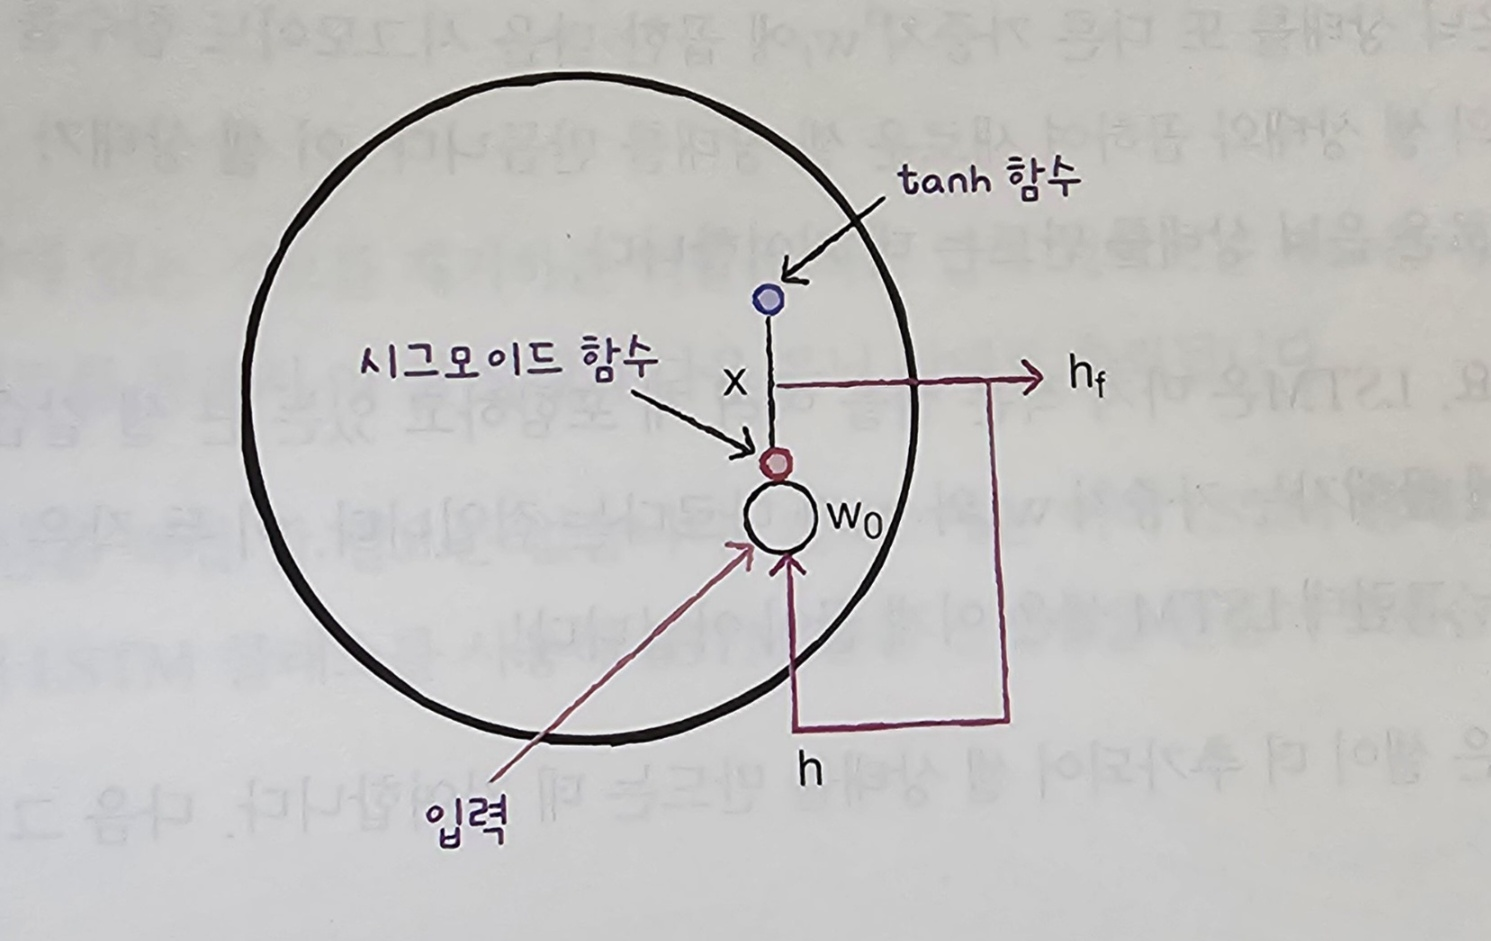

은닉 상태를 계산할 때 사용하는 wx와 wh를 통틀어 wo라고 표시

파란색 원은 tanh함수 / 주황색 원은 시그모이드 함수

X는 곱셈

LSTM은 순환되는 상태가 **2개**이다.

은닉 상태 말고 **셀 상태(cell state)**라고 부르는 값이 있다.

셀 상태란 은닉 상태와 달리 다음 층으로 전달되지 않고 LSTM 셀에서 순환만 되는 값이다.

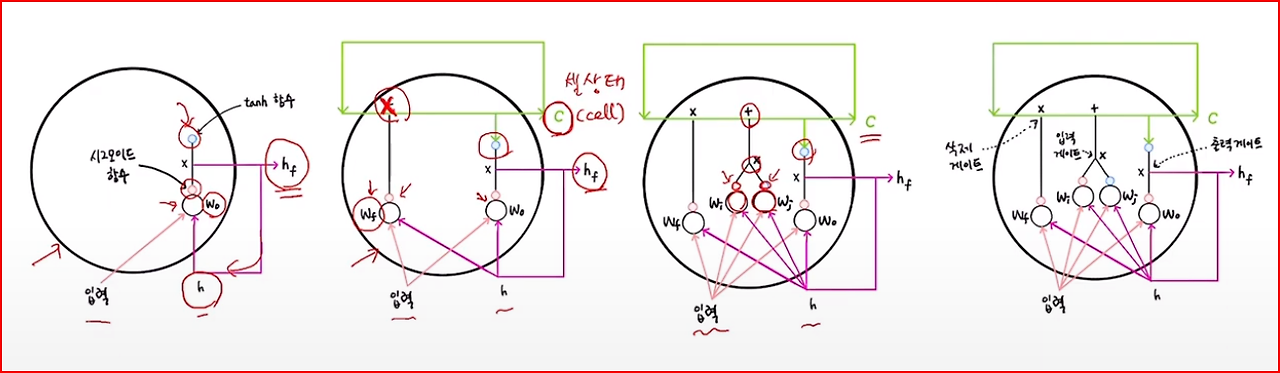

위의 오른쪽에서 2번째 그림에서 녹색 부분이 셀 상태이다.

셀 상태를 계산하는 과정

1.   입력과 은닉 상태를 또 다른 가중치 wf에 곱한다음 시그모이드 함수를 통과
2.   이전 타임스텝의 셀 상태와 곱하여 새로운 셀 상태 만듬
3.   오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는데 기여


*입력과 은닉 상태에 곱해지는 가중치 wo와 wf가 다름

이 두 작은 셀은 각기 다른 기능을 위해 훈련됨



세 번째 그림을 보면 2개의 작은 셀을 추가하여 셀 상태를 만드는데 기여한다.

이전과 마찬가지로 입력과 은닉 상태를 각기 다른 가중치에 곱한다음

1.   이전과 마찬가지로 입력과 은닉 상태를 각기 다른 가중치에 곱한다
2.   하나는 시그모이드 나머지 하나는 tanh을 통과시킨다.
3.   그 다음 두 결과를 곱한 후 이전 셀 상택와 더한다.
4.   이 결과가 최종적인 다음 셀 상태가 된다.



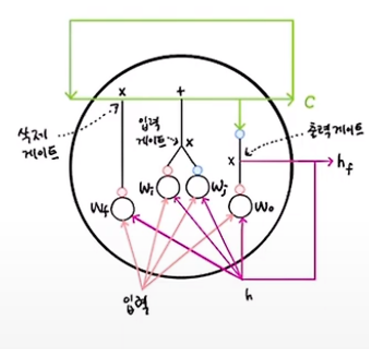

세 군데의 곱셈을 왼쪽부터 차례대로 삭제 게이트, 입력 게이트, 출력 게이트라고 부른다.

삭제 게이트 : 셀 상태에 있는 정보를 제거하는 역할

입력 게이트 : 새로운 정보를 셀 상테에 추가

출력 게이트 : 셀 상태가 다음 은닉 상태로 출력

---



# **LSTM 신경망 훈련**

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input,test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input,maxlen = 100)
val_seq = pad_sequences(val_input,maxlen = 100)

In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_lstm_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.5166 - loss: 0.6929 - val_accuracy: 0.5920 - val_loss: 0.6918
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.6108 - loss: 0.6910 - val_accuracy: 0.6370 - val_loss: 0.6892
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.6378 - loss: 0.6877 - val_accuracy: 0.6440 - val_loss: 0.6837
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.6550 - loss: 0.6799 - val_accuracy: 0.6682 - val_loss: 0.6686
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.6833 - loss: 0.6563 - val_accuracy: 0.7114 - val_loss: 0.6097
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.7242 - loss: 0.5881 - val_accuracy: 0.7368 - val_loss: 0.5681
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.7446 - loss: 0.5571 - val_accuracy: 0.7520 - val_loss: 0.5472
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.7527 - loss: 0

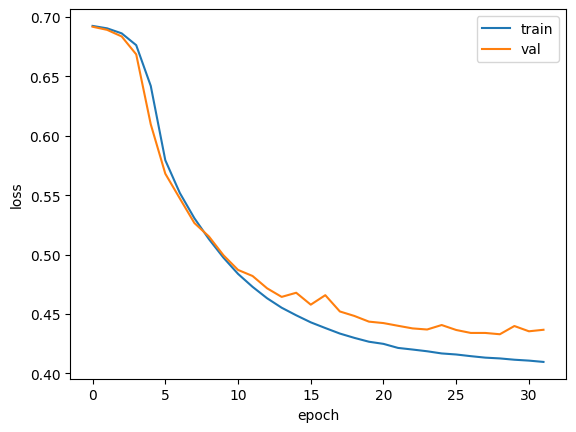

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# **순환층에 드롭아웃 적용**

완전 연결 신경망과 합성곱 신경망에서는 Dropout 클래스를 사용해 드롭아웃을 적용했었다.

순환층은 자체적으로 드롭아웃을 제공하는데, SimpleRNN과 LSTM 클래스는 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있다.

*recurrent_dropout은 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법

**하지만 recurrent_dropout은 기술적인 문제로 GPU를 사용하여 모델 훈련이 불가능하다.

In [8]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length = 100))
model2.add(keras.layers.LSTM(8,dropout = 0.3))
model2.add(keras.layers.Dense(1,activation = 'sigmoid'))

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_dropout_lstm_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.5144 - loss: 0.6928 - val_accuracy: 0.5208 - val_loss: 0.6926
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.5510 - loss: 0.6920 - val_accuracy: 0.5618 - val_loss: 0.6914
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.5956 - loss: 0.6906 - val_accuracy: 0.5986 - val_loss: 0.6894
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.6104 - loss: 0.6881 - val_accuracy: 0.6240 - val_loss: 0.6855
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.6300 - loss: 0.6832 - val_accuracy: 0.6418 - val_loss: 0.6772
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.6420 - loss: 0.6730 - val_accuracy: 0.6820 - val_loss: 0.6573
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.6858 - loss: 0.6463 - val_accuracy: 0.7242 - val_loss: 0.5999
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.7176 - loss: 0

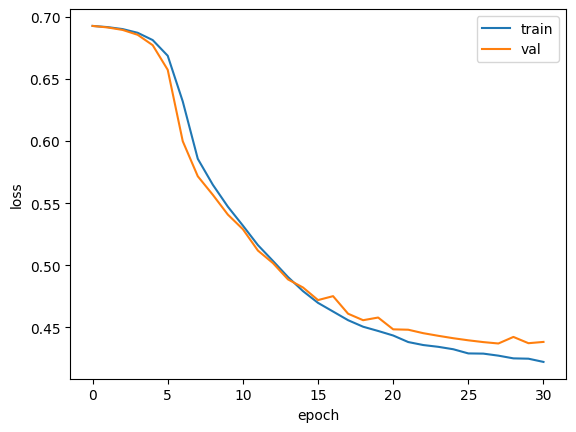

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# **2개의 층을 연결하기**
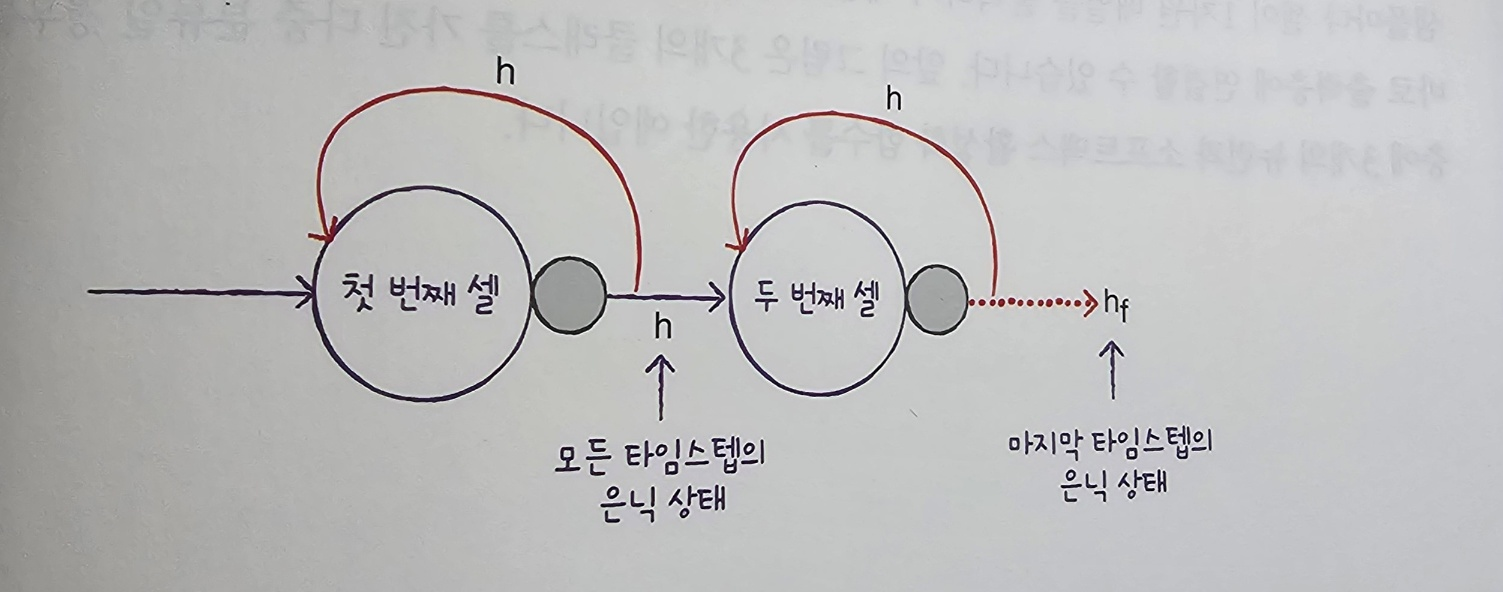

순환층을 연결할 때는 한 가지 주의할 점이 있다.

순환층의 은닉 상태는 샘플 마지막 타임스텝에 대한 은닉상태만 다음 층으로 전달하기 때문에 순차데이터를 넘겨줄 수 있도록 수정해야한다.

즉, 마지막 층을 제외한 모든 순환층에 return_sequences 매개변수를 True 로 지정해야한다.

In [14]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length = 100))
model3.add(keras.layers.LSTM(8,dropout = 0.3,return_sequences= True))
model3.add(keras.layers.LSTM(8,dropout = 0.3))
model3.add(keras.layers.Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
model3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 8)              │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,708 (73.08 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,355 (36.55 KB)

In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_2LSTM_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model3.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step - accuracy: 0.5087 - loss: 0.6931 - val_accuracy: 0.5838 - val_loss: 0.6926
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 96ms/step - accuracy: 0.5450 - loss: 0.6924 - val_accuracy: 0.6248 - val_loss: 0.6914
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 86ms/step - accuracy: 0.5942 - loss: 0.6907 - val_accuracy: 0.6228 - val_loss: 0.6876
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.6185 - loss: 0.6847 - val_accuracy: 0.6790 - val_loss: 0.6670
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.6661 - loss: 0.6551 - val_accuracy: 0.7074 - val_loss: 0.6026
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.6985 - loss: 0.5978 - val_accuracy: 0.7240 - val_loss: 0.5601
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.7326 - loss: 0.5525 - val_accuracy: 0.7376 - val_loss: 0.5347
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.7548 - loss: 0

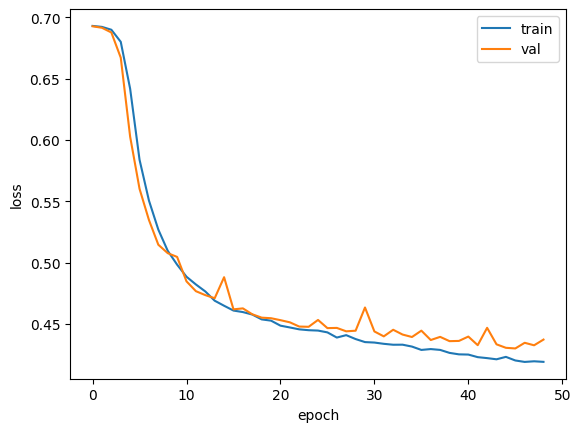

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()



---



# **GRU 구조**

GRU는 Grated Recurrent Unit의 약자이다. 이 셀은 LSTM을 간소화한 버전으로 생각할 수 있다.

이 셀은 LSTM처럼 셀 상태를 계산하지 않고 은닉 상태 하나만 포함하고 있다.

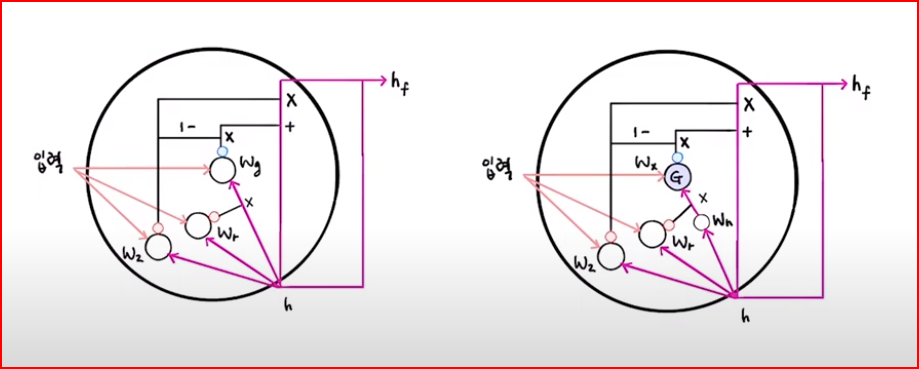

GRU 셀에는 은닉 생태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀 3개 들어있다.

2개는 시그모이드 활성화 함수를 사용하고 하나는 tanh 함수를 사용한다.

맨 왼쪽 wz를 사용하는 셀의 출력이 은닉 상태에 바로 곱해져 삭제 게이트 역할을 한다.

이와 똑같은 출력을 1에서 뺀 다음 가장 오른쪽 wg를 사용하는 셀의 출력에 곱한다. 이는 정보를 제어하는 역할을 수행한다.

가운데 wr을 사용하는 셀에서 출력된 값은 wg 셀이사용할 은닉 상태의 정보를 제어한다.

GRU셀은 LSTM보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지않은 성능을 낸다.

In [19]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length = 100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
model4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

입력에 곱하는 가중치는 16 x 8 = 128개

은닉 상태에 곱하는 가중치 8 x 8 = 64개

절편마다 뉴련 +8

= 200개

하지만 summary()에서는 메서드의 출력이 624개이다.

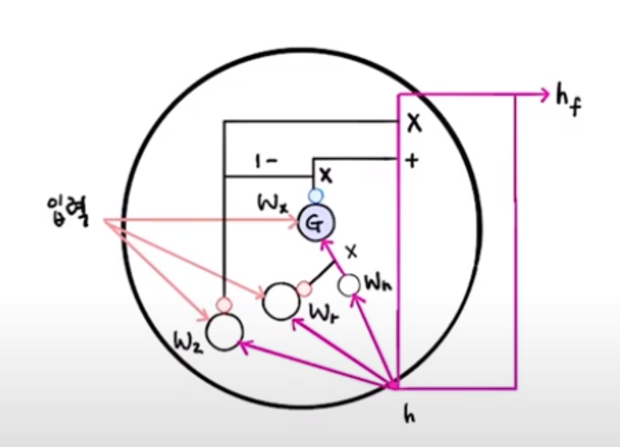

위의 계산과 다른 이유는 G로 표시된 작은 셀에 들어가는 입력 부분이 새롭게 나오기 때문이다.

이전에는 가운데 셀의 출력과 은닉 상태가 곱해진 후 G 셀에 입력되는데, 이 그림에 따르면 은닉 상태가 먼저 가중치와 곱해진 후 가운데 셀과 곱해진다.

그래서 이전에는 입력과 은닉 상태에 곱해지는 가중치를 wg로 별도 표기하였지만 이 그림에서는 wx 와 wh로 나누었다.

이렇게 나눠서 계산하면 은닉 상태에 곱해지는 절편이 별도로 필요하다.

작은 셀마다 하나씩 절편이 추가되고 8개의 뉴련이 있으므로 총 24개의 모델 파라미터가 더해지기에 624개가 된다.

16(입력의 크기) x 8(뉴런의 수) x 3(은닉 유닛의 수) = 384

8(은닉 상태의 크기) x 8(뉴런 개수) x 3(은닉 유닛의 수) = 192

24(기존 절편) + 24(은닉 절편) = 48

384 + 192 + 48 = 624개

In [21]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_gru_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model4.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.5159 - loss: 0.6930 - val_accuracy: 0.5430 - val_loss: 0.6923
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.5382 - loss: 0.6921 - val_accuracy: 0.5604 - val_loss: 0.6915
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.5615 - loss: 0.6911 - val_accuracy: 0.5640 - val_loss: 0.6902
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.5790 - loss: 0.6892 - val_accuracy: 0.5704 - val_loss: 0.6884
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.5838 - loss: 0.6872 - val_accuracy: 0.5754 - val_loss: 0.6858
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - accuracy: 0.5957 - loss: 0.6840 - val_accuracy: 0.5866 - val_loss: 0.6819
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.6076 - loss: 0.6792 - val_accuracy: 0.6026 - val_loss: 0.6758
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 63ms/step - accuracy: 0.6224 - loss: 0

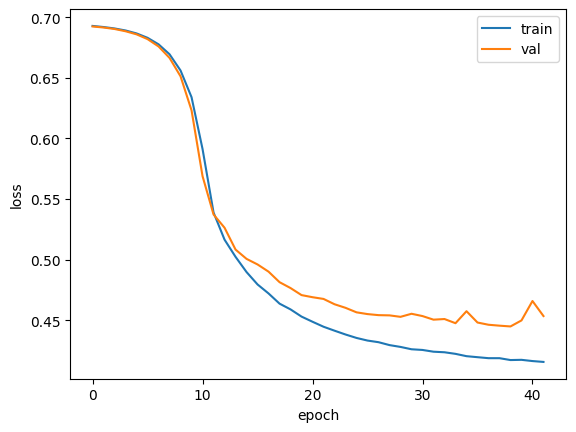

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()